In [19]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [20]:
df = pd.read_csv('./dataset.csv')
df.head()

,Hours,Score
0,1.5,20
1,3.0,45
2,4.5,50
3,5.0,55
4,6.5,65


Text(0.5, 1.0, 'Hours Study vs Exam Score')

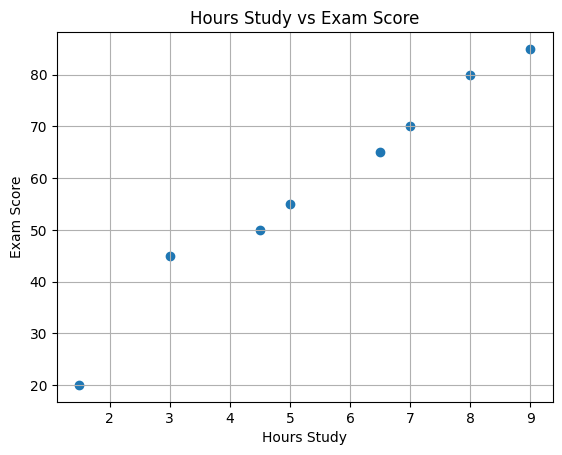

In [21]:
plt.scatter(df['Hours'], df[' Score'])
plt.xlabel('Hours Study')
plt.ylabel('Exam Score')
plt.grid(True)
plt.title('Hours Study vs Exam Score')

In [22]:
theta0 = 0
theta1 = 0
learning_rate = 0.01
epochs = 1000

In [23]:
def compute_cost(X,y, theta0, theta1):
    n = len(X)
    prediction = theta0 + theta1 * X

    cost = (1/n) * np.sum((y - prediction) ** 2)
    return cost

In [24]:
X = df['Hours']
y = df[' Score']

initial_cost = compute_cost(X, y, theta0, theta1)
initial_cost

np.float64(3837.5)

In [25]:
def gradient_descent(X, y, theta0, theta1, learning_rate, epochs):
    n = len(X)
    cost_history = []

    for epoch in range (epochs):
        prediction = theta0 + theta1 * X
        error = prediction - y

        d_theta0 = (1/n) * np.sum(error)
        d_theta1 = (1/n) * np.sum(error * X)

        theta0 = theta0 - learning_rate * d_theta0
        theta1 = theta1 - learning_rate * d_theta1

        cost = compute_cost(X, y, theta0=theta0, theta1=theta1)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"Iteration {epoch}: Cost {cost}")

    return theta0, theta1, cost_history

In [26]:
final_theta0, final_theta1, cost_history = gradient_descent(X, y, theta0, theta1, learning_rate, epochs)

print(f"Final Theta0 value is: {final_theta0}")
print(f"Final Theta1 value is: {final_theta1}")

Iteration 0: Cost 1522.0109530639647
Iteration 100: Cost 27.569182785061436
Iteration 200: Cost 23.33321723649025
Iteration 300: Cost 20.201867175649383
Iteration 400: Cost 17.88708130425923
Iteration 500: Cost 16.17592364820703
Iteration 600: Cost 14.910985685669855
Iteration 700: Cost 13.97590641731113
Iteration 800: Cost 13.284668377177946
Iteration 900: Cost 12.773684929789761
Final Theta0 value is: 10.828985482355536
Final Theta1 value is: 8.543454150936471


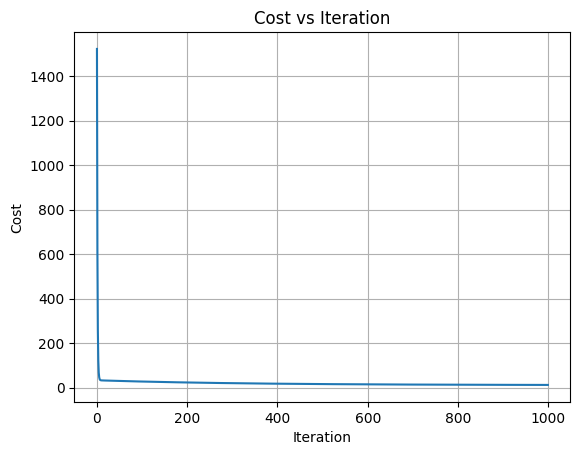

In [27]:
plt.plot(range(epochs), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.title('Cost vs Iteration')
plt.grid(True)
plt.show()

In [28]:
def predict(hours, theta0, theta1):
    return theta0 + theta1 * hours

In [35]:
predicted_score = predict(8, final_theta0, final_theta1)
print(f"Predicted Score for {6.5} hours of study = {predicted_score:.2f}%")

Predicted Score for 6.5 hours of study = 79.18%


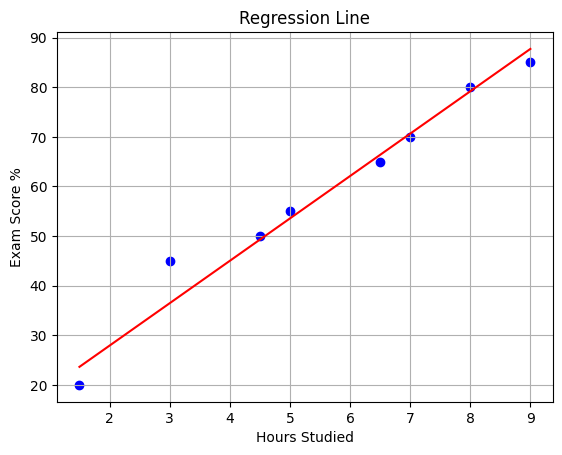

In [33]:
plt.scatter(X, y, color='blue')
predicted_line = final_theta0 + final_theta1 * X
plt.plot(X, predicted_line, color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score %')
plt.title('Regression Line')
plt.grid(True)
plt.show()

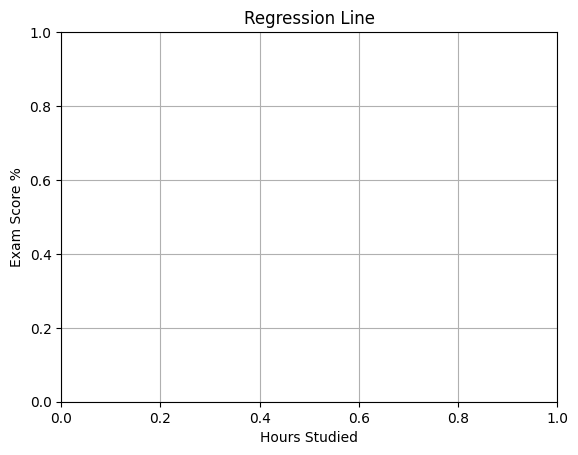